In [207]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir
from os.path import isfile, join
from math import gcd
from scipy.optimize import curve_fit

plt.style.use('./figuras.mplstyle')


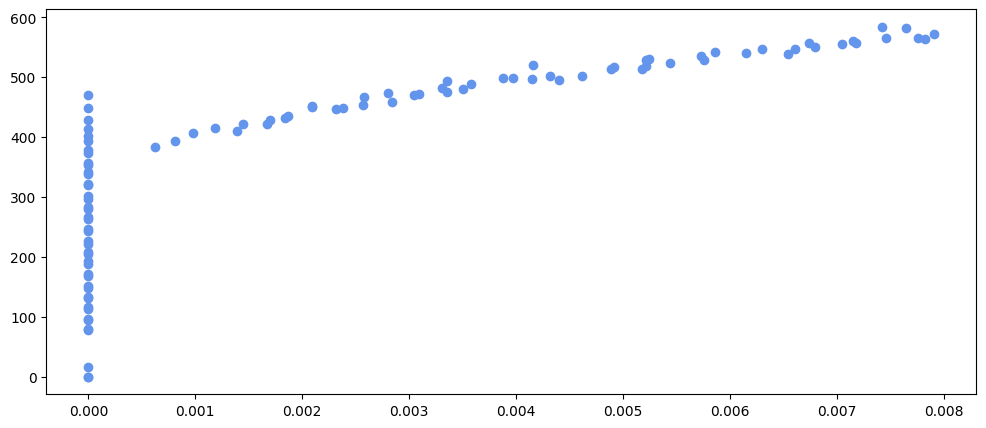

In [36]:
nro_medicion = 50
path = f'./25-10/Medición nro {nro_medicion}.csv'
# Labo 5-GLOW\Labo5-Glow\25-10\Medición nro 20.csv
df = pd.read_csv(path)

I = df['I'].values
V = df['V'].values


fig, ax = plt.subplots(figsize = (12,5))

ax.scatter(I,V, color = 'cornflowerblue');
fig.savefig(f'./25-10/Figuras/Medición nro {nro_medicion}',dpi = 800,format = 'png')

Levanta todas las figuras de las mediciones

In [39]:
path = f'./25-10' # Foldder where measurements are
onlyfiles = [file for file in listdir(path) if isfile(join(path, file))] #isfile returns a boolean if the specified path is a file or not
print(onlyfiles)

['Medición nro 20.csv', 'Medición nro 21.csv', 'Medición nro 22.csv', 'Medición nro 23.csv', 'Medición nro 24.csv', 'Medición nro 25.csv', 'Medición nro 26 (1).csv', 'Medición nro 26.csv', 'Medición nro 27 (1).csv', 'Medición nro 27.csv', 'Medición nro 28 (1).csv', 'Medición nro 28.csv', 'Medición nro 30 (1).csv', 'Medición nro 30.csv', 'Medición nro 31 (1).csv', 'Medición nro 31.csv', 'Medición nro 32 (1).csv', 'Medición nro 32.csv', 'Medición nro 33 (1).csv', 'Medición nro 33.csv', 'Medición nro 34.csv', 'Medición nro 35.csv', 'Medición nro 36.csv', 'Medición nro 37.csv', 'Medición nro 42.csv', 'Medición nro 50.csv', 'Medición nro 51.csv', 'Medición nro 52.csv', 'Medición nro 53.csv', 'Medición nro 54.csv', 'Medición nro 55.csv', 'Medición nro 56.csv', 'Medición nro 57.csv', 'Medición nro 60.csv', 'Medición nro 61.csv', 'Medición nro 62.csv', 'Medición nro 63.csv', 'Medición nro 64.csv']


In [50]:
fnt_size = 18

for file in onlyfiles:

    df = pd.read_csv(join(path,file))
    I = df['I'].values
    V = df['V'].values


    fig, ax = plt.subplots(figsize = (12,5))

    ax.scatter(I,V,color = 'cornflowerblue')

    ax.set_title(f'{file}',fontsize = fnt_size + 2)
    ax.set_xlabel('Corriente [A]',fontsize = fnt_size)
    ax.set_ylabel('Voltaje suministrado [V]',fontsize = fnt_size)
    ax.grid()
    ax.grid(alpha = 0.7)
    ax.set_xlim(min(I),max(I))
    ax.minorticks_on()

    fig_format = 'png'
    fig_path = f'{file.rstrip(".csv")}.{fig_format}'

    fig.savefig(f'./25-10/Figuras/{fig_path}',dpi = 800, bbox_inches = 'tight')
    plt.close(fig) #Closes the fig instance so as to not use to much memory 

Curvas de Paschen ------------------------------------------------------------------------------------------

In [166]:
path = f'./25-10/Mediciones Paschen' # Foldder where measurements are
onlyfiles = [file for file in listdir(path) if isfile(join(path, file))] #isfile returns a boolean if the specified path is a file or not
print(onlyfiles)

['Medición nro 30.csv', 'Medición nro 32.csv', 'Medición nro 33.csv', 'Medición nro 34.csv', 'Medición nro 35.csv', 'Medición nro 36.csv', 'Medición nro 37.csv', 'Medición nro 42.csv', 'Medición nro 50.csv', 'Medición nro 51.csv', 'Medición nro 52.csv', 'Medición nro 53.csv', 'Medición nro 54.csv', 'Medición nro 55.csv', 'Medición nro 56.csv', 'Medición nro 57.csv', 'Medición nro 60.csv', 'Medición nro 61.csv', 'Medición nro 62.csv', 'Medición nro 63.csv', 'Medición nro 64.csv']


In [167]:
V_ruptura = np.array([])
paschen_nr = np.array([])
for file in onlyfiles:
    # print(f'{file}')
    df = pd.read_csv(join(path,file))
    I = df['I'].values
    V = df['V'].values
    d = df['Distancia'].values
    P = df['P'].values
    mean_pressure = np.mean(P)*0.750062
    i = 0
    while I[i] < 10**(-6):
        # print(f'i:{i}')
        # print(f'V:{V[i]} I:{I[i]}')
        i += 1
    # print(f'exit i: {i}')
    V_ruptura = np.append(V_ruptura,V[i-1])
    paschen_nr = np.append(paschen_nr,mean_pressure*d[0])
    # print(f'V Ruptura: {V_ruptura[-1]} pd: {[paschen_nr[-1]]}')

    graficar = False

    if graficar:
        fig, ax = plt.subplots(figsize = (12,7))

        ax.set_title(f'{file}',fontsize = fnt_size + 2)
        ax.set_xlabel('Corriente [A]',fontsize = fnt_size)
        ax.set_ylabel('Voltaje suministrado [V]',fontsize = fnt_size)
        ax.grid()
        ax.grid(alpha = 0.7)
        ax.set_xlim(min(I),max(I))
        ax.minorticks_on()
        
        ax.scatter(I,V,color = 'cornflowerblue')
        ax.scatter(I[i-1],V[i-1],color = 'Tomato')

        fig_path = f'Paschen {file.rstrip(".csv")}.{fig_format}'

        fig.savefig(f'./25-10/Figuras/Paschen/{fig_path}',dpi = 800, bbox_inches = 'tight')
        plt.close(fig) #Closes the fig instance so as to not use to much memory 


    

In [170]:
print(f'V ruptura')
print(V_ruptura)
print(f'paschen nr')
print(paschen_nr)

V ruptura
[536.4067, 396.4614, 580.3889, 421.4296, 478.5731, 660.7022, 526.981, 310.8383, 470.2013, 420.9024, 537.5594, 598.5207, 432.4641, 406.5215, 409.1362, 386.1035, 969.4933, 481.1804, 451.2982, 403.8912, 558.1955]
paschen nr
[1.71094243 1.73747212 1.50269221 1.70596051 1.79581404 1.99100358
 1.15003406 0.61835111 1.0035417  0.56870076 1.05760992 1.52900139
 0.82144915 0.44038015 0.27004482 0.39791164 0.11332724 0.46030555
 0.46067683 0.31592611 0.30770543]


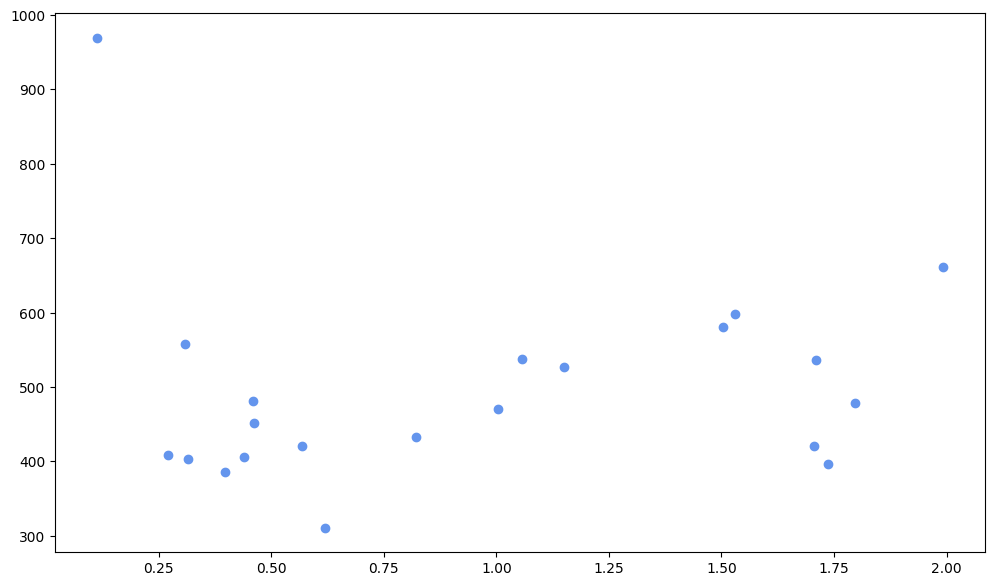

In [169]:
fig, ax = plt.subplots(figsize = (12,7))

ax.scatter(paschen_nr,V_ruptura,color = 'cornflowerblue');


In [82]:
import plotly.express as px
import plotly.graph_objects as go

In [189]:
# V_ruptura = [536.4067 , 396.4614 , 580.3889 ,  421.4296 , 478.5731,
#              660.7022, 526.981, 310.8383, 470.2013, 420.9024, 537.5594,
#               598.5207, 432.4641, 406.5215, 409.1362, 386.1035, 969.4933,
#                481.1804, 451.2982, 403.8912, 558.1955]

# paschen_nr_revised = [1.71094243, 1.73747212, 1.50269221, 1.70596051, 1.79581404, 1.99100358,
#  1.15003406, 0.61835111, 1.0035417,  0.56870076, 1.05760992, 1.52900139,
#  0.82144915, 0.44038015, 0.27004482, 0.39791164, 0.11332724, 0.46030555,
#  0.46067683, 0.31592611, 0.30770543]

V_ruptura = [ 580.3889,
             660.7022, 526.981, 470.2013, 420.9024, 537.5594,
              598.5207, 432.4641, 969.4933,
               481.1804, 451.2982, 558.1955]

paschen_nr_revised = [ 1.50269221,
                       1.99100358, 1.15003406, 1.0035417,  0.56870076, 1.05760992,
                         1.52900139, 0.82144915, 0.11332724,
                         0.46030555, 0.46067683, 0.30770543]
print(len(V_ruptura),len(paschen_nr))

12 21


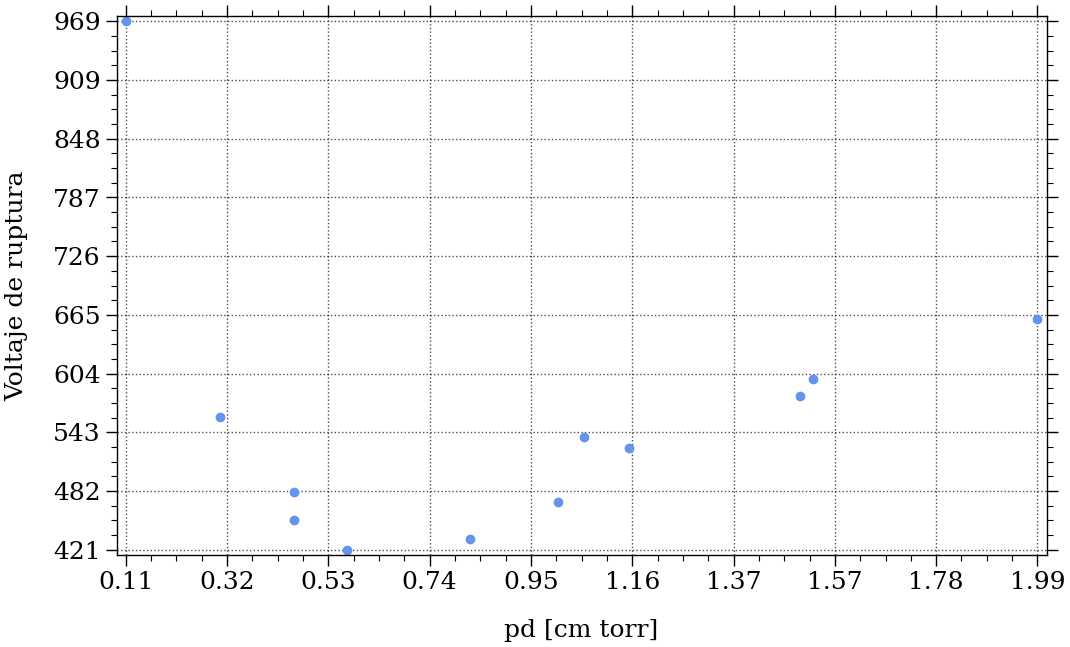

In [205]:
fig, ax = plt.subplots(figsize = (12,7))

ax.scatter(paschen_nr_revised,V_ruptura,color = 'cornflowerblue');
# ax.set_title(f'{file}',fontsize = fnt_size + 2)
ax.set_xlabel('pd [cm torr]',fontsize = fnt_size)
ax.set_ylabel('Voltaje de ruptura',fontsize = fnt_size)
ax.grid()
ax.grid(alpha = 0.7)
# ax.set_xlim(min(paschen_nr_revised),max(paschen_nr_revised))
ax.margins(x = 0.01 , y = 0.01)
ax.minorticks_on()


#Eje X
xlabels = np.linspace(min(paschen_nr_revised),max(paschen_nr_revised),10,endpoint = True)
ax.set_xticks(xlabels);
ax.set_xticklabels([f'{number:.2f}' for number in xlabels]);

#Eje X
ylabels = np.linspace(min(V_ruptura),max(V_ruptura),10,endpoint = True)
ax.set_yticks(ylabels);
ax.set_yticklabels([f'{number:.0f}' for number in ylabels]);
fig.savefig(f'./25-10/Figuras/Paschen/Paschen Curve.pdf',dpi = 800, bbox_inches = 'tight');


AJUSTE PASCHEN

In [220]:
def paschen_curve(pd,B,delta,A):
    pd_delta = pd + delta
    V_ruptura = (B*(pd + delta))/np.log(A*(pd + delta))
    return V_ruptura

popt, pcov = curve_fit(paschen_curve,xdata = paschen_nr_revised, ydata = V_ruptura,p0 = [1,5,1])

C:\Users\lucio\AppData\Local\Temp\ipykernel_10912\2240967185.py:3: RuntimeWarning:

invalid value encountered in log



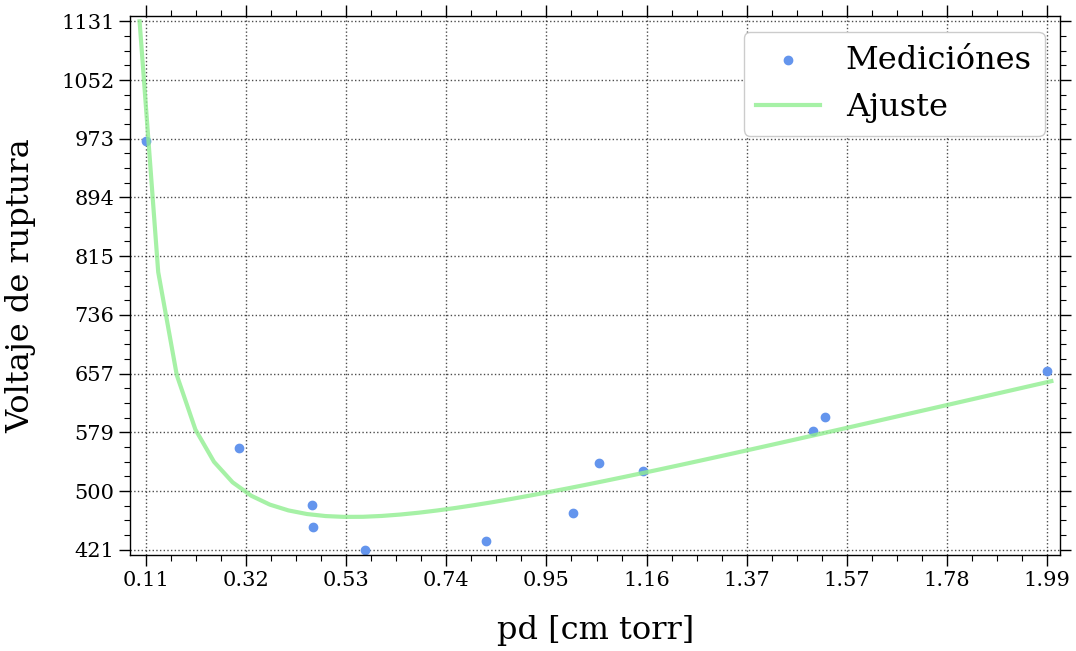

In [238]:
x = np.linspace(0.1,2,50)

fig, ax = plt.subplots(figsize = (12,7))

fnt_size = 23

ax.scatter(paschen_nr_revised,V_ruptura,color = 'cornflowerblue',label = f'Mediciónes');
ax.plot(x,paschen_curve(x,*popt),linewidth = 3, alpha = 0.8, label = f'Ajuste')
# ax.set_title(f'{file}',fontsize = fnt_size + 2)
ax.set_xlabel('pd [cm torr]',fontsize = fnt_size)
ax.set_ylabel('Voltaje de ruptura',fontsize = fnt_size)
ax.grid()
ax.grid(alpha = 0.7)
# ax.set_xlim(min(paschen_nr_revised),max(paschen_nr_revised))
ax.margins(x = 0.01 , y = 0.01)
ax.minorticks_on()


#Eje X
xlabels = np.linspace(min(paschen_nr_revised),max(paschen_nr_revised),10,endpoint = True)
ax.set_xticks(xlabels);
ax.set_xticklabels([f'{number:.2f}' for number in xlabels],fontsize = fnt_size - 8);

#Eje Y
ylabels = np.linspace(min(V_ruptura),paschen_curve(0.1,*popt),10,endpoint = True)
ax.set_yticks(ylabels);
ax.set_yticklabels([f'{number:.0f}' for number in ylabels],fontsize = fnt_size - 8);

ax.legend(fontsize = fnt_size);
fig.savefig(f'./25-10/Figuras/Paschen/Paschen Curve with fit.pdf',dpi = 800, bbox_inches = 'tight');


In [224]:
print(paschen_curve(0.1,*popt))

1130.5664302748296


In [164]:
file = onlyfiles[23]

df = pd.read_csv(join(path,file))
# paschen_df = df.loc[df['I'] < 10**(-5)]
I = df['I'].values
V = df['V'].values
d = df['Distancia'].values
P = df['P'].values
mean_pressure = np.mean(P)

end = 15
fig = px.scatter(None,y = V[:end], x = I[:end], title = f'{file}')
fig.show()

In [89]:
i = 0
while I[i] < 10**(-6):
        print(V[i])
        i += 1

225.1594573681008
278.51223927841454
315.3888114727445
352.3612503921373
388.4186456088912
425.3946408230293
462.6203970356646
498.936060862627
536.4067469515085
